In [1]:
import os
os.chdir('E:/final_dataset/')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 4, 4
sc.settings.set_figure_params(dpi=100, dpi_save=300,facecolor='white')
sc.logging.print_header()

scanpy==1.9.1 anndata==0.9.1 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.0.2 statsmodels==0.13.2 python-igraph==0.10.4 pynndescent==0.5.10


## import neuron dataset

In [2]:
neu = sc.read_h5ad('10x_cn_neuron_mtx/cn_neurons.h5ad')

In [3]:
neu.obs['gene_labels'] = (
    neu.obs["clusters"]
    .map(lambda x: {
        'Octopus':'Phdgh',
        'Bushy_Atoh7':'Atoh7',
        'Bushy_Hhip':'Hhip',
        'T-stellate':'Fam129a',
        'Fusiform':'Necab2',
        'UBC':'Samd3-UBC',
        'GC':'Gabra6-GC',
        'Golgi':'Tfap2b-Golgi',
        'Cartwheel':'Stac',
        'SSC':'Kit/Ptprk',
        'L-stellate':'Kit/Cdh22',
        'Vertical':'Penk',
        'D-stellate':'Sst/Slc6a5'
                   }.get(x, x))
    .astype("category"))

In [4]:
neu.uns['gene_labels_colors'] = neu.uns['clusters_colors']

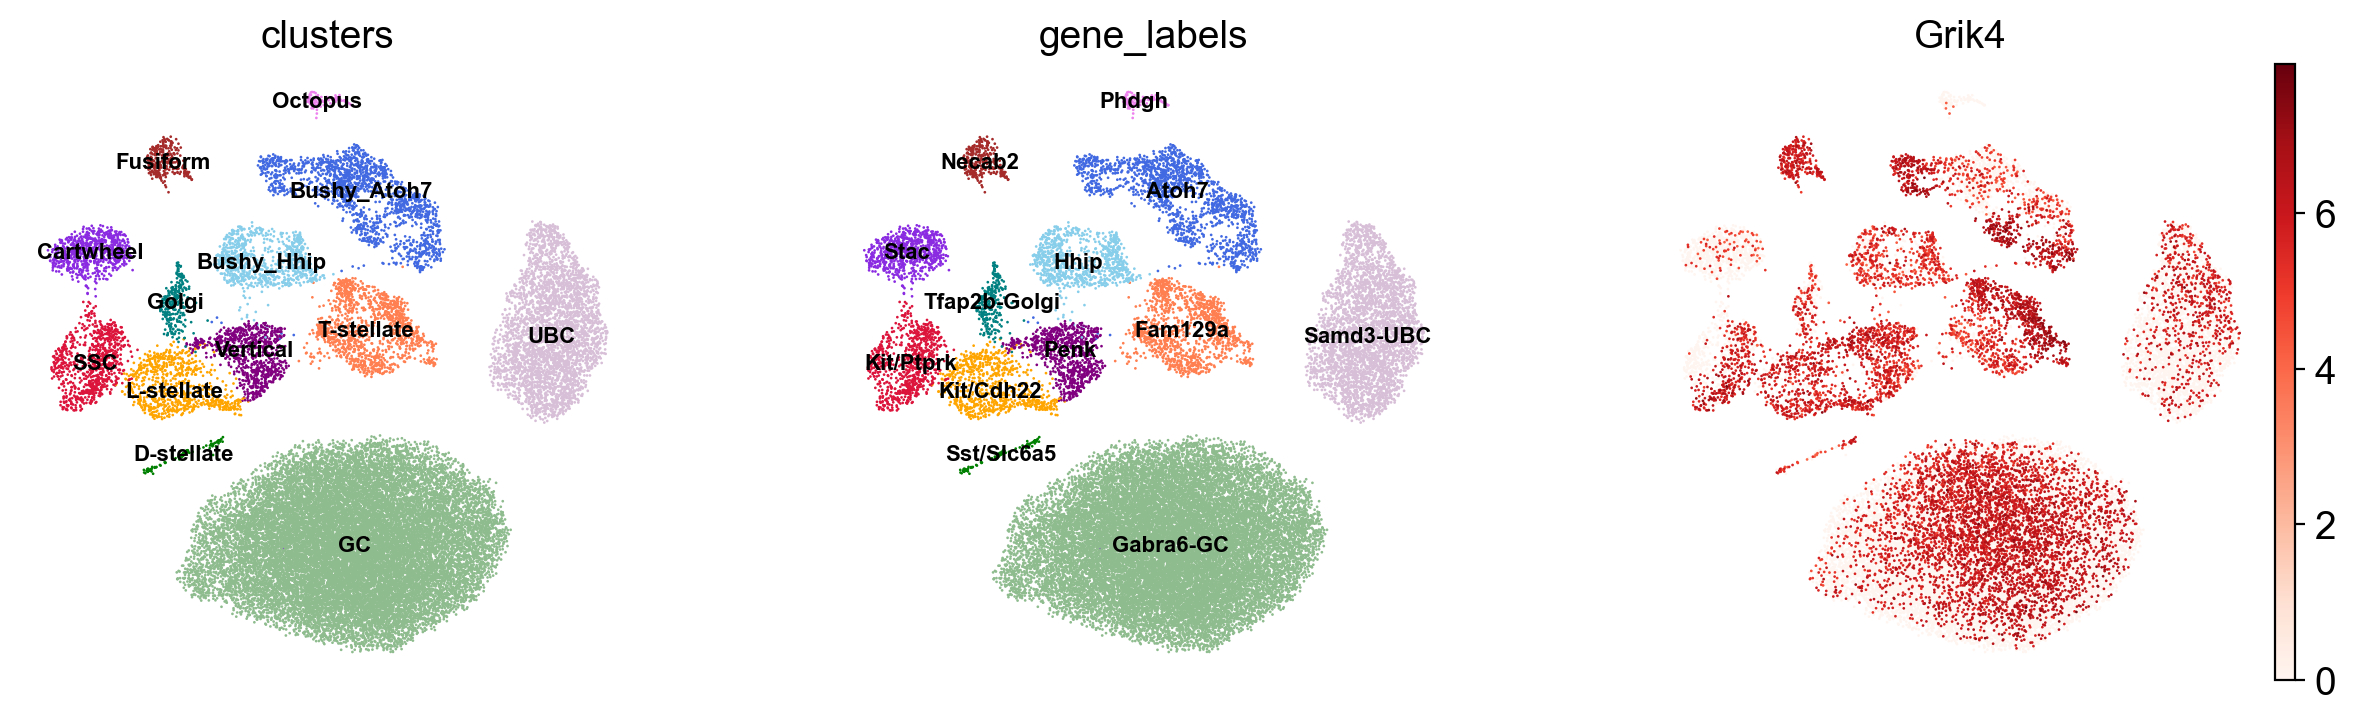

In [12]:
sc.pl.umap(neu, color = ['clusters', 'gene_labels','Grik4'],cmap = 'Reds',
          frameon =False,legend_loc ='on data', legend_fontsize = 8)

In [6]:
sc.tl.dendrogram(neu, groupby='gene_labels')

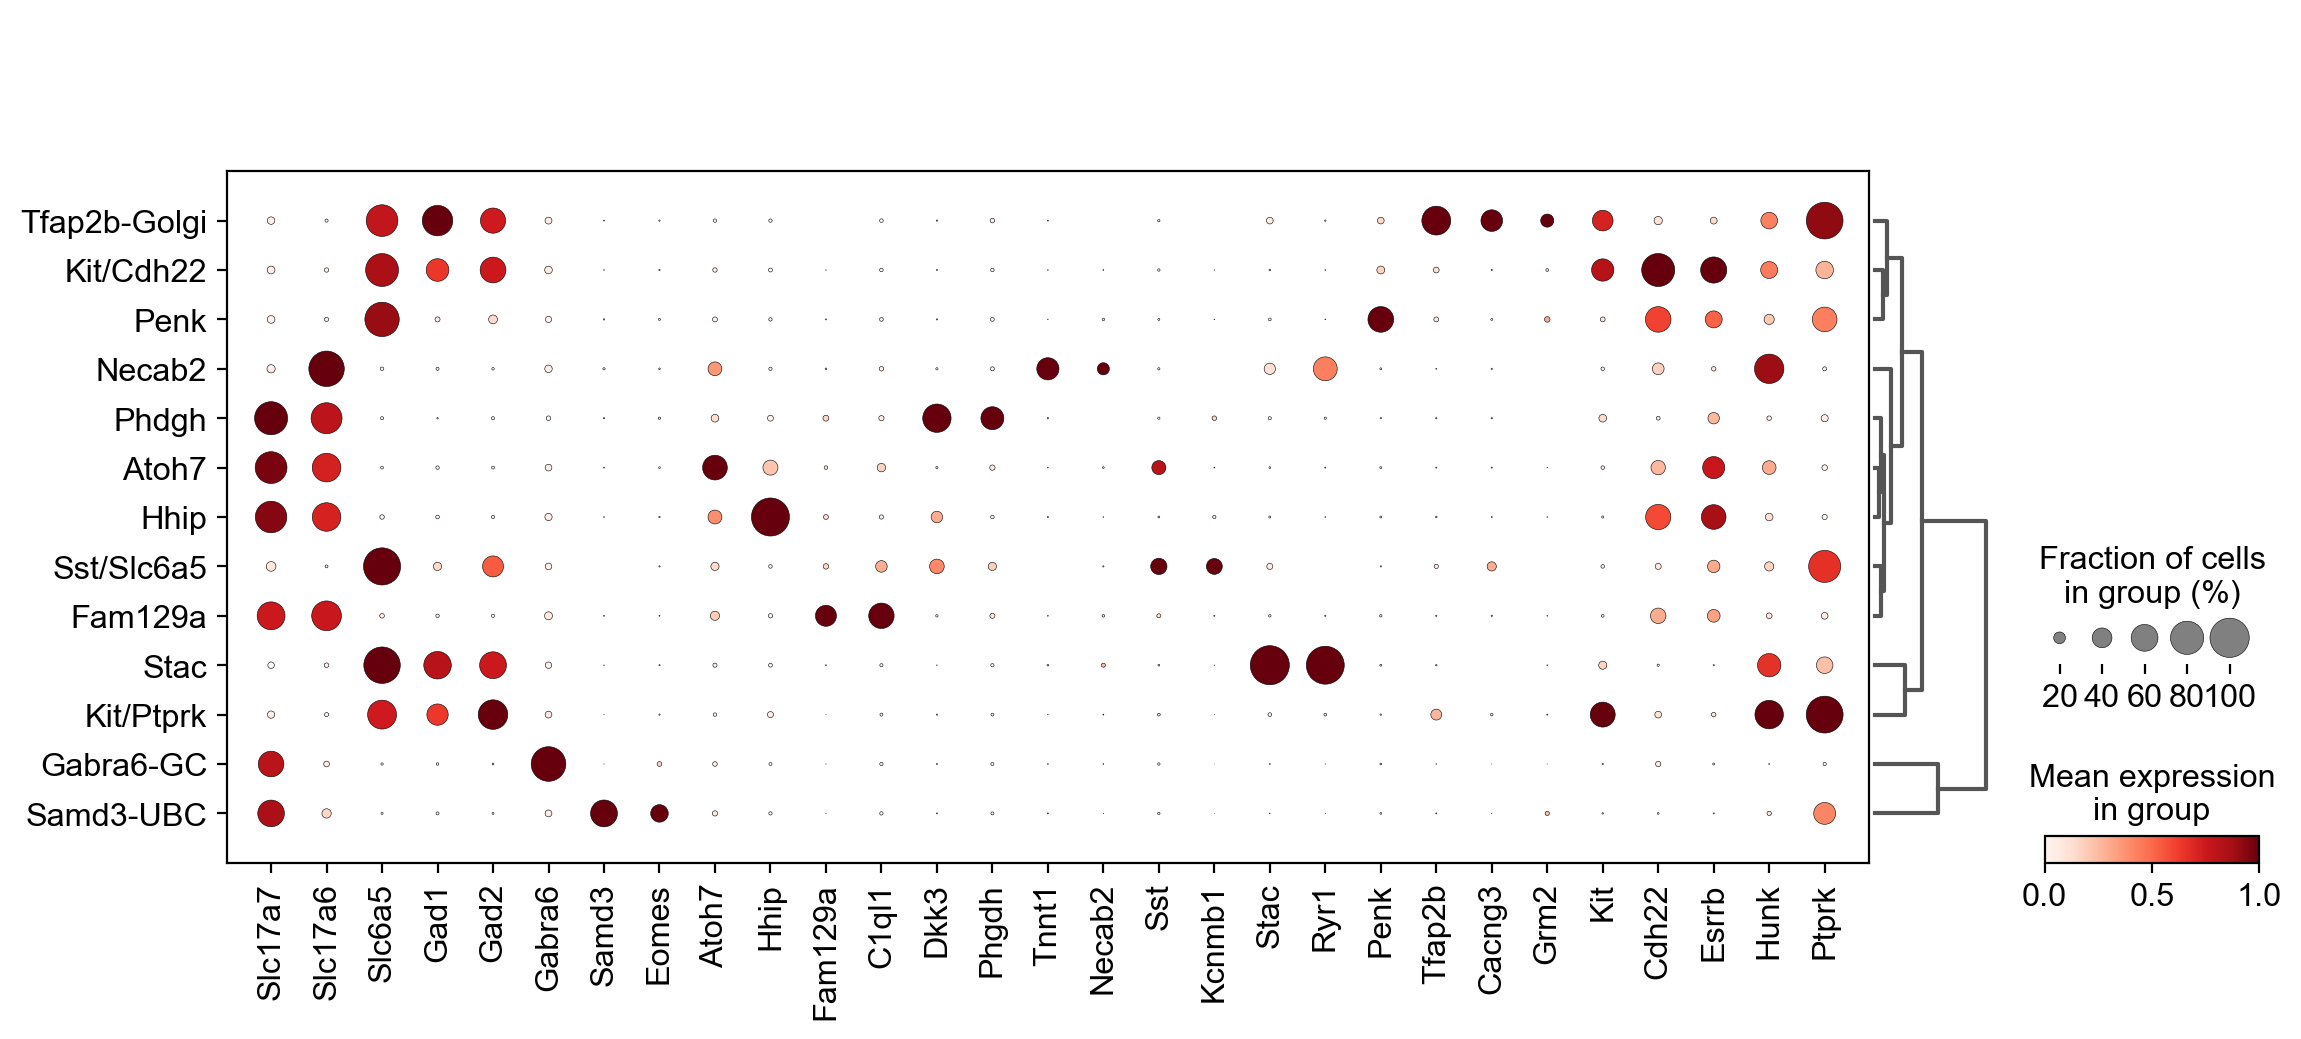

In [7]:
genes = ['Slc17a7','Slc17a6','Slc6a5','Gad1','Gad2','Gabra6','Samd3','Eomes',
        'Atoh7','Hhip',
         'Fam129a','C1ql1',
         'Dkk3','Phgdh',
         'Tnnt1','Necab2',
         'Sst','Kcnmb1',
         'Stac','Ryr1',
         'Penk',
         'Tfap2b','Cacng3','Grm2',
         'Kit','Cdh22','Esrrb','Hunk','Ptprk']
sc.pl.dotplot(neu, genes, groupby='gene_labels',
              dendrogram=True, 
              swap_axes=False,#dot_max = 1.0,dot_min = 0.2,
              #vmin= 0.2,
            standard_scale = 'var',
             #save = '_neuall1.pdf'
             )

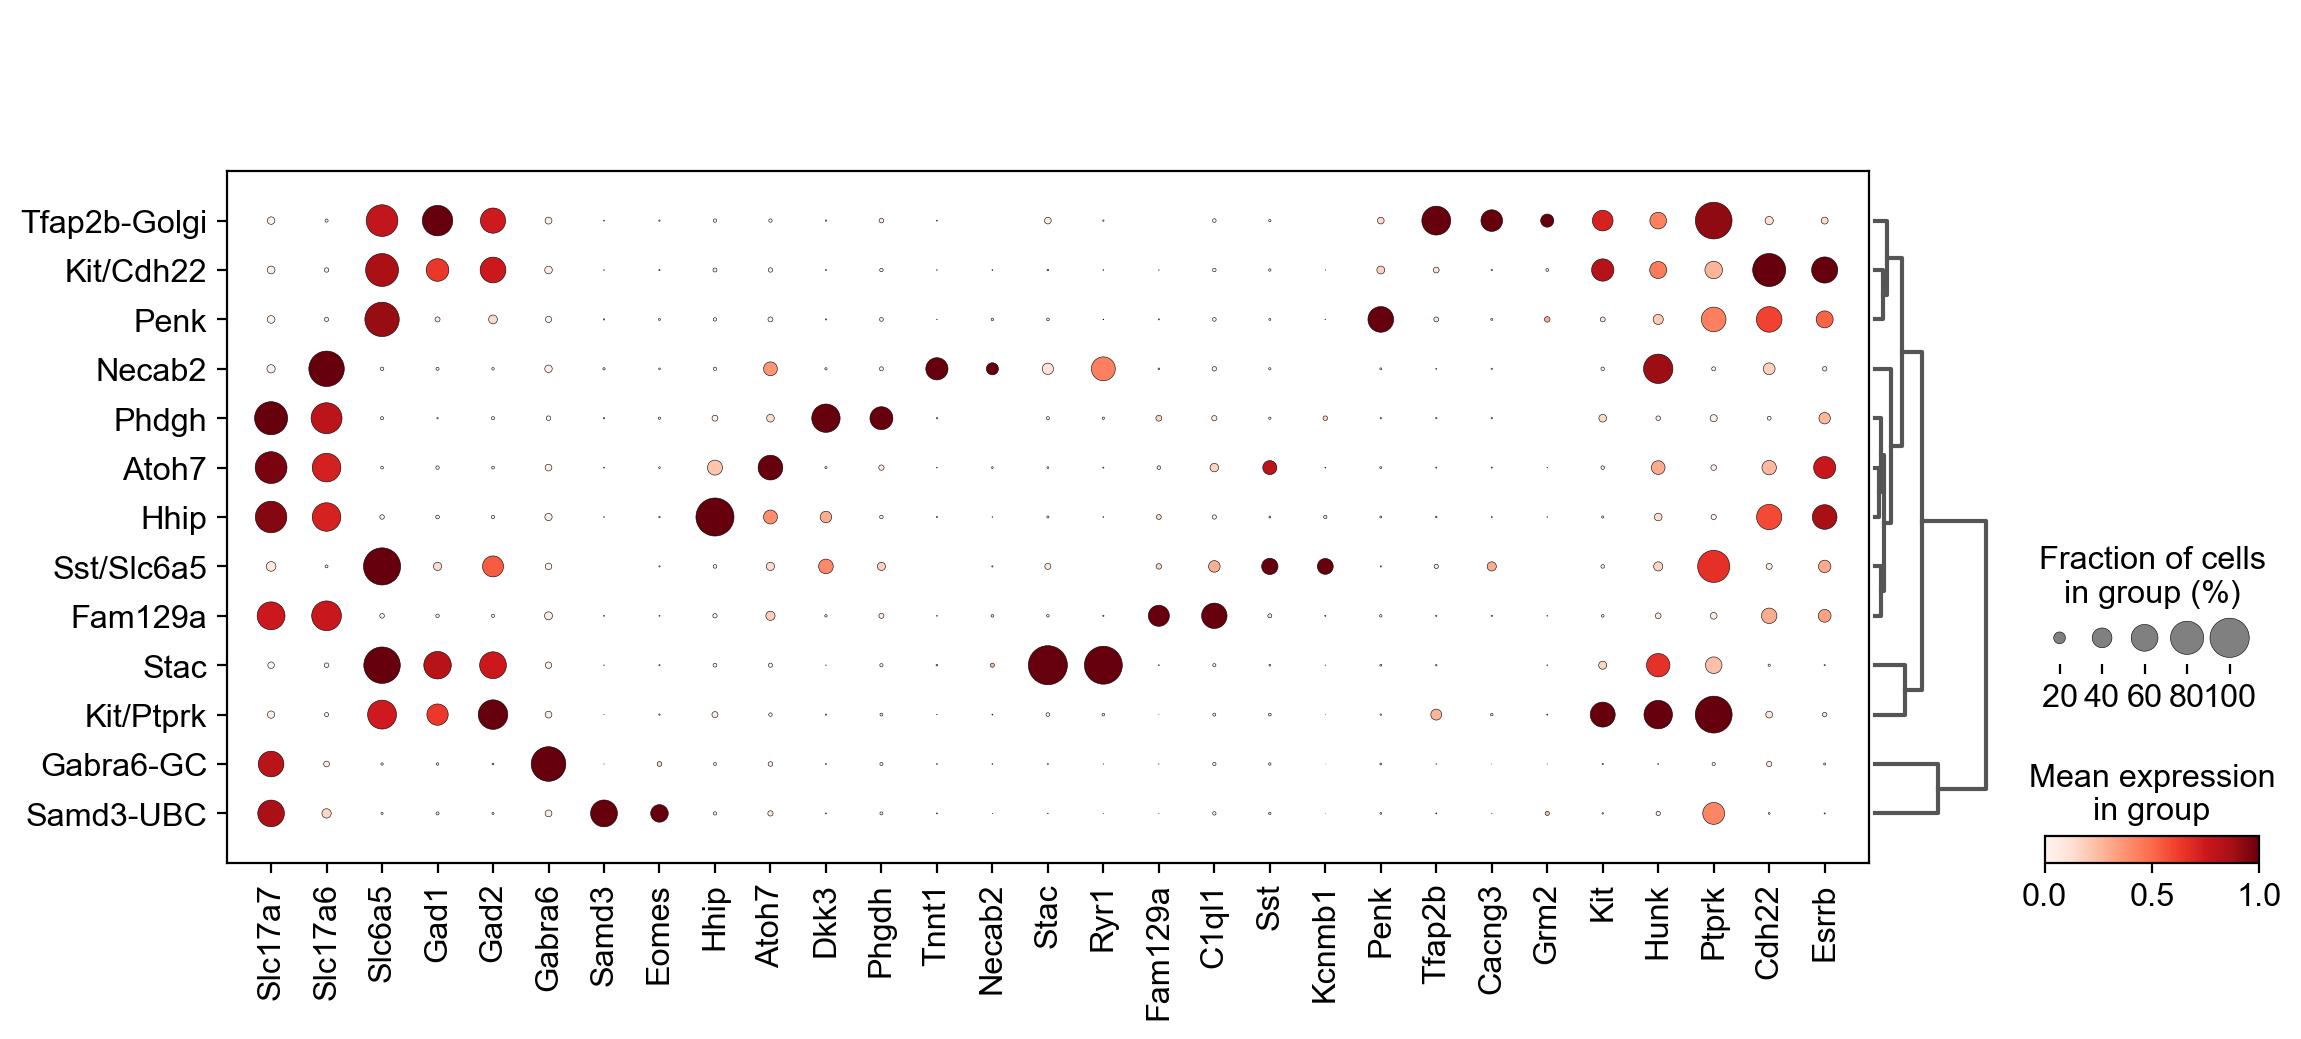

In [18]:
genes = ['Slc17a7','Slc17a6','Slc6a5','Gad1','Gad2','Gabra6','Samd3','Eomes',
         'Hhip','Atoh7',  
          'Dkk3','Phgdh',
         'Tnnt1','Necab2',
         'Stac','Ryr1',
         'Fam129a','C1ql1',
         'Sst','Kcnmb1', 
         'Penk',
         'Tfap2b','Cacng3','Grm2',
         'Kit','Hunk','Ptprk','Cdh22','Esrrb',
        ]
sc.pl.dotplot(neu, genes, groupby='gene_labels',
              dendrogram=True, 
              swap_axes=False,#dot_max = 1.0,dot_min = 0.2,
              #vmin= 0.2,
            standard_scale = 'var',
             #save = '_neuall1.pdf'
             )

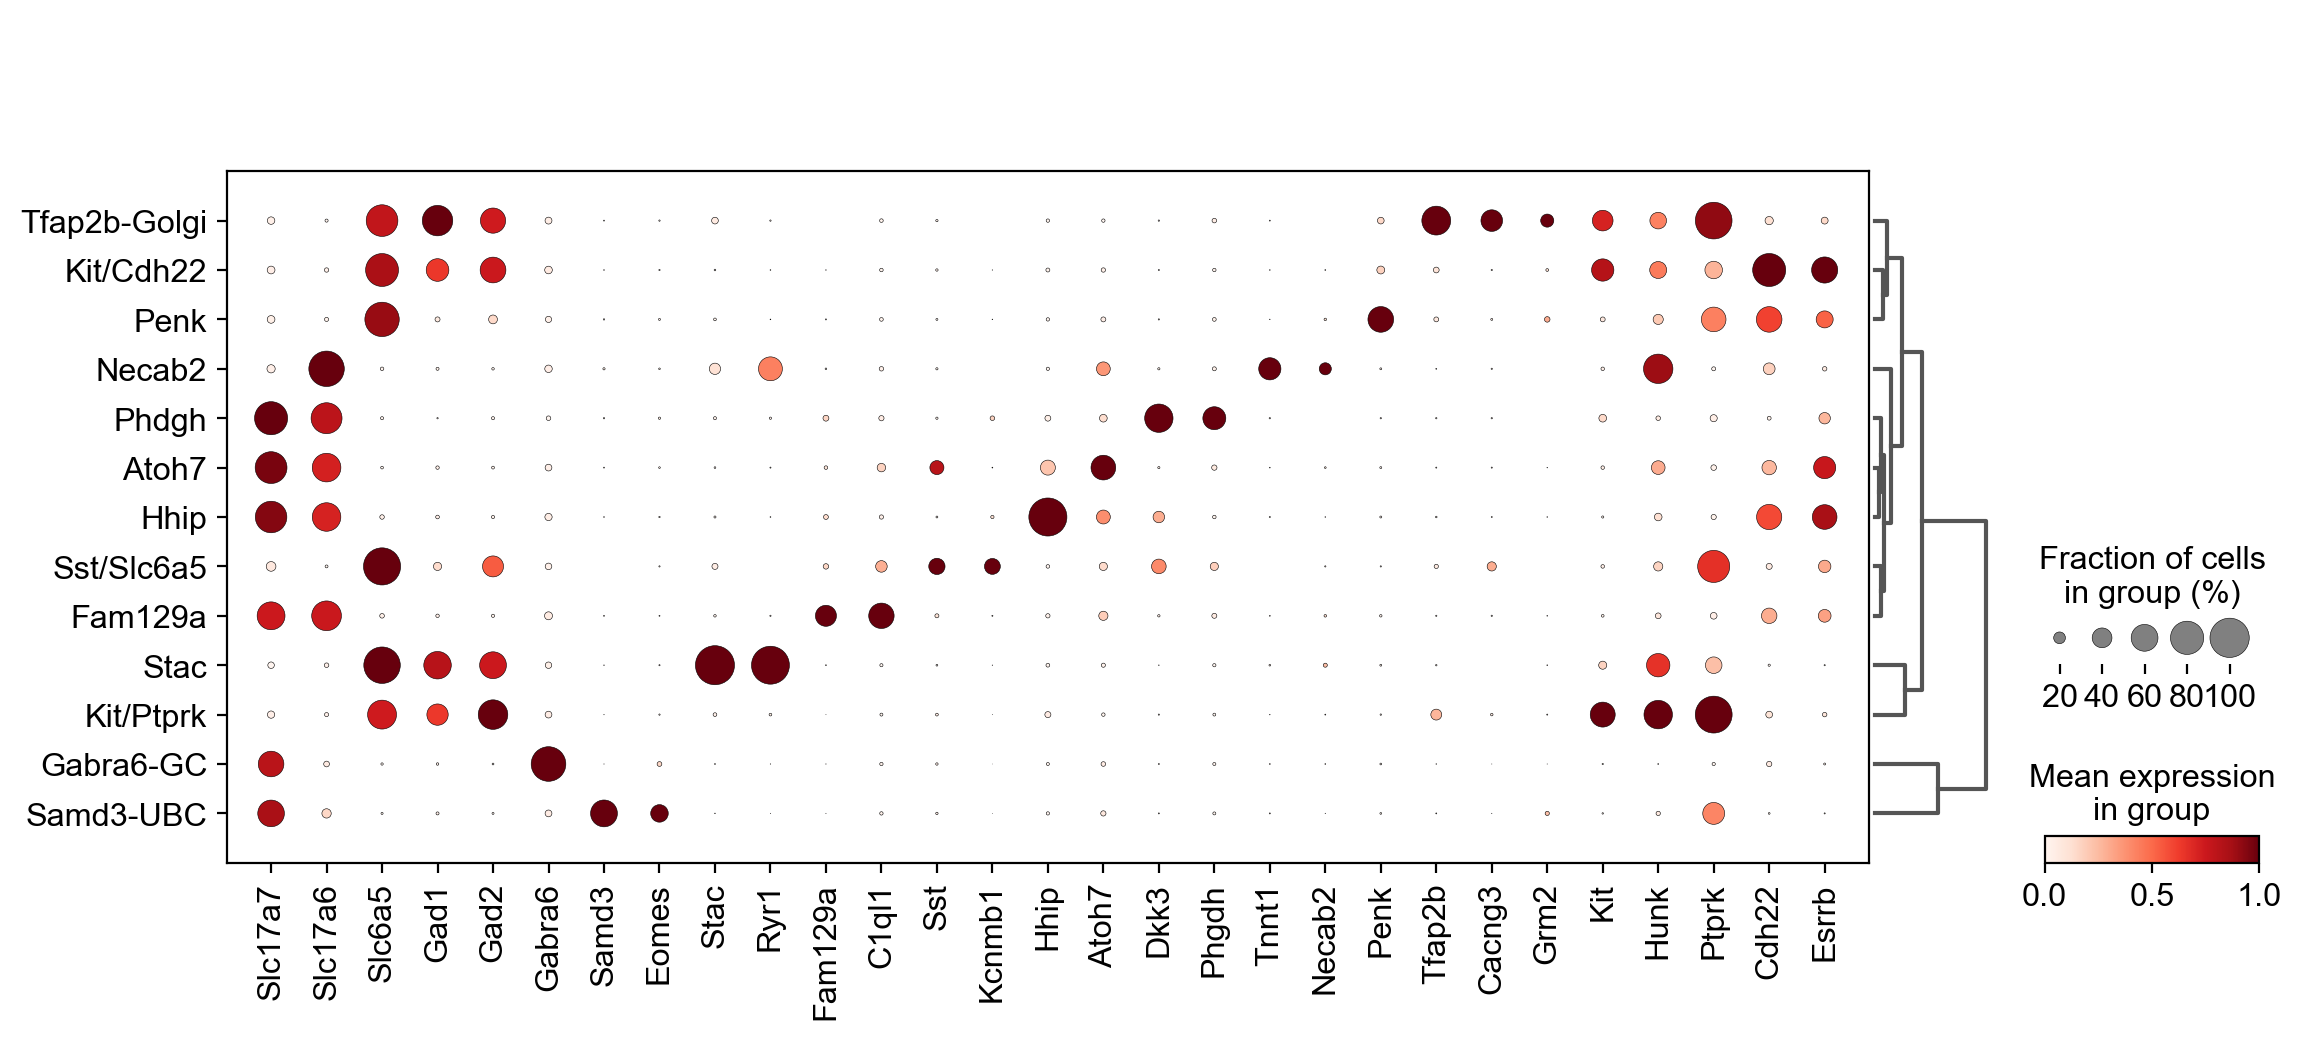

In [14]:
genes = ['Slc17a7','Slc17a6','Slc6a5','Gad1','Gad2','Gabra6','Samd3','Eomes',
         'Stac','Ryr1',
         'Fam129a','C1ql1',
         'Sst','Kcnmb1', 
         'Hhip','Atoh7',         
         'Dkk3','Phgdh',
         'Tnnt1','Necab2',
         'Penk',
         'Tfap2b','Cacng3','Grm2',
         'Kit','Hunk','Ptprk','Cdh22','Esrrb',
        ]
sc.pl.dotplot(neu, genes, groupby='gene_labels',
              dendrogram=True, 
              swap_axes=False,#dot_max = 1.0,dot_min = 0.2,
              #vmin= 0.2,
            standard_scale = 'var',
             #save = '_neuall1.pdf'
             )

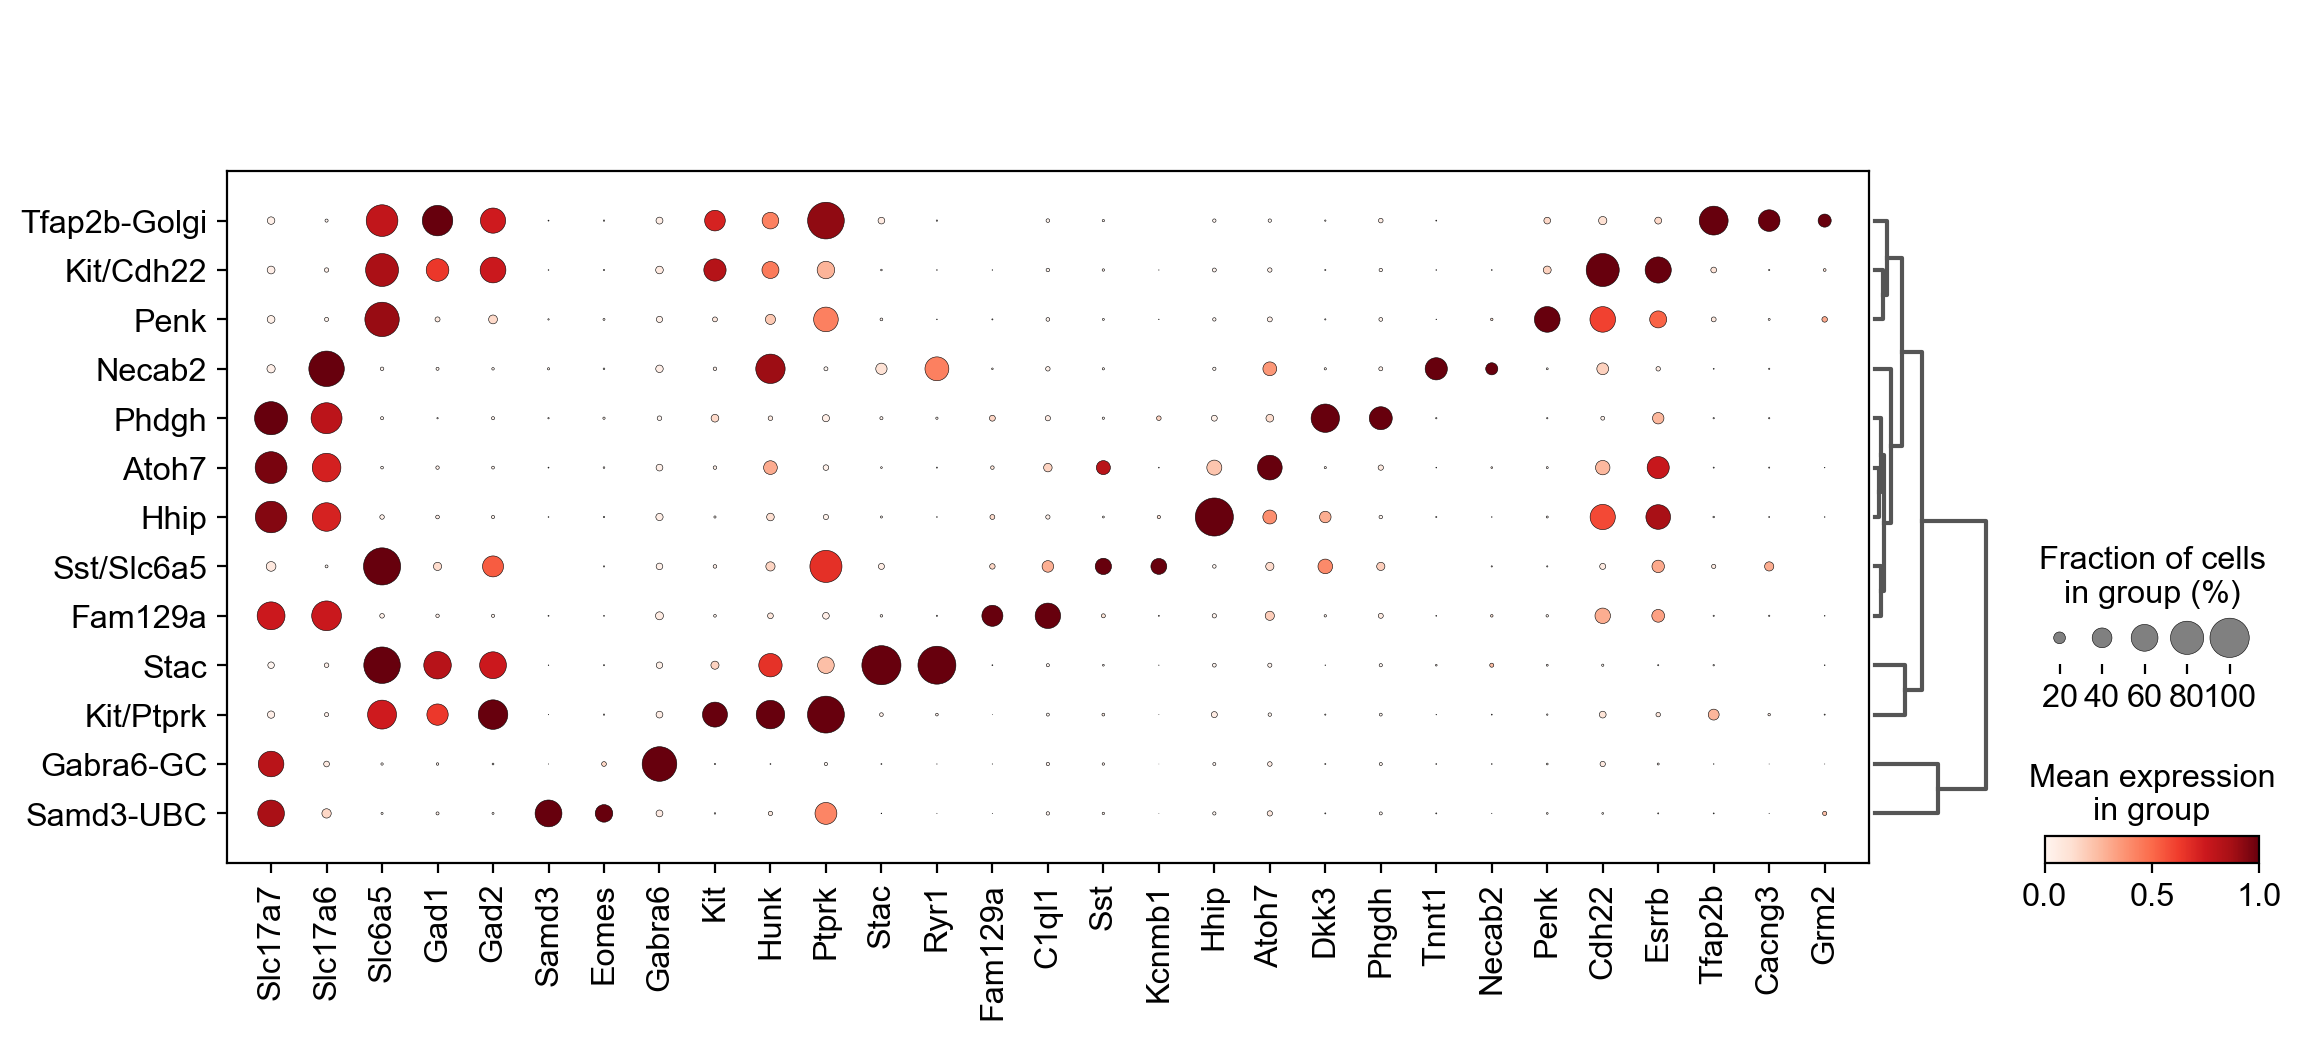

In [19]:
genes = ['Slc17a7','Slc17a6','Slc6a5','Gad1','Gad2','Samd3','Eomes','Gabra6',
         'Kit','Hunk','Ptprk',
         'Stac','Ryr1',
         'Fam129a','C1ql1',
         'Sst','Kcnmb1', 
         'Hhip','Atoh7',         
         'Dkk3','Phgdh',
         'Tnnt1','Necab2',
         'Penk',
         'Cdh22','Esrrb',
         'Tfap2b','Cacng3','Grm2',
         
        ]
sc.pl.dotplot(neu, genes, groupby='gene_labels',
              dendrogram=True, 
              swap_axes=False,#dot_max = 1.0,dot_min = 0.2,
              #vmin= 0.2,
            standard_scale = 'var',
             save = '_neuall1.pdf'
             )

## import all 10x dataset

In [6]:
cn = sc.read_h5ad('10x_cn_mtx/cn.all.h5ad')

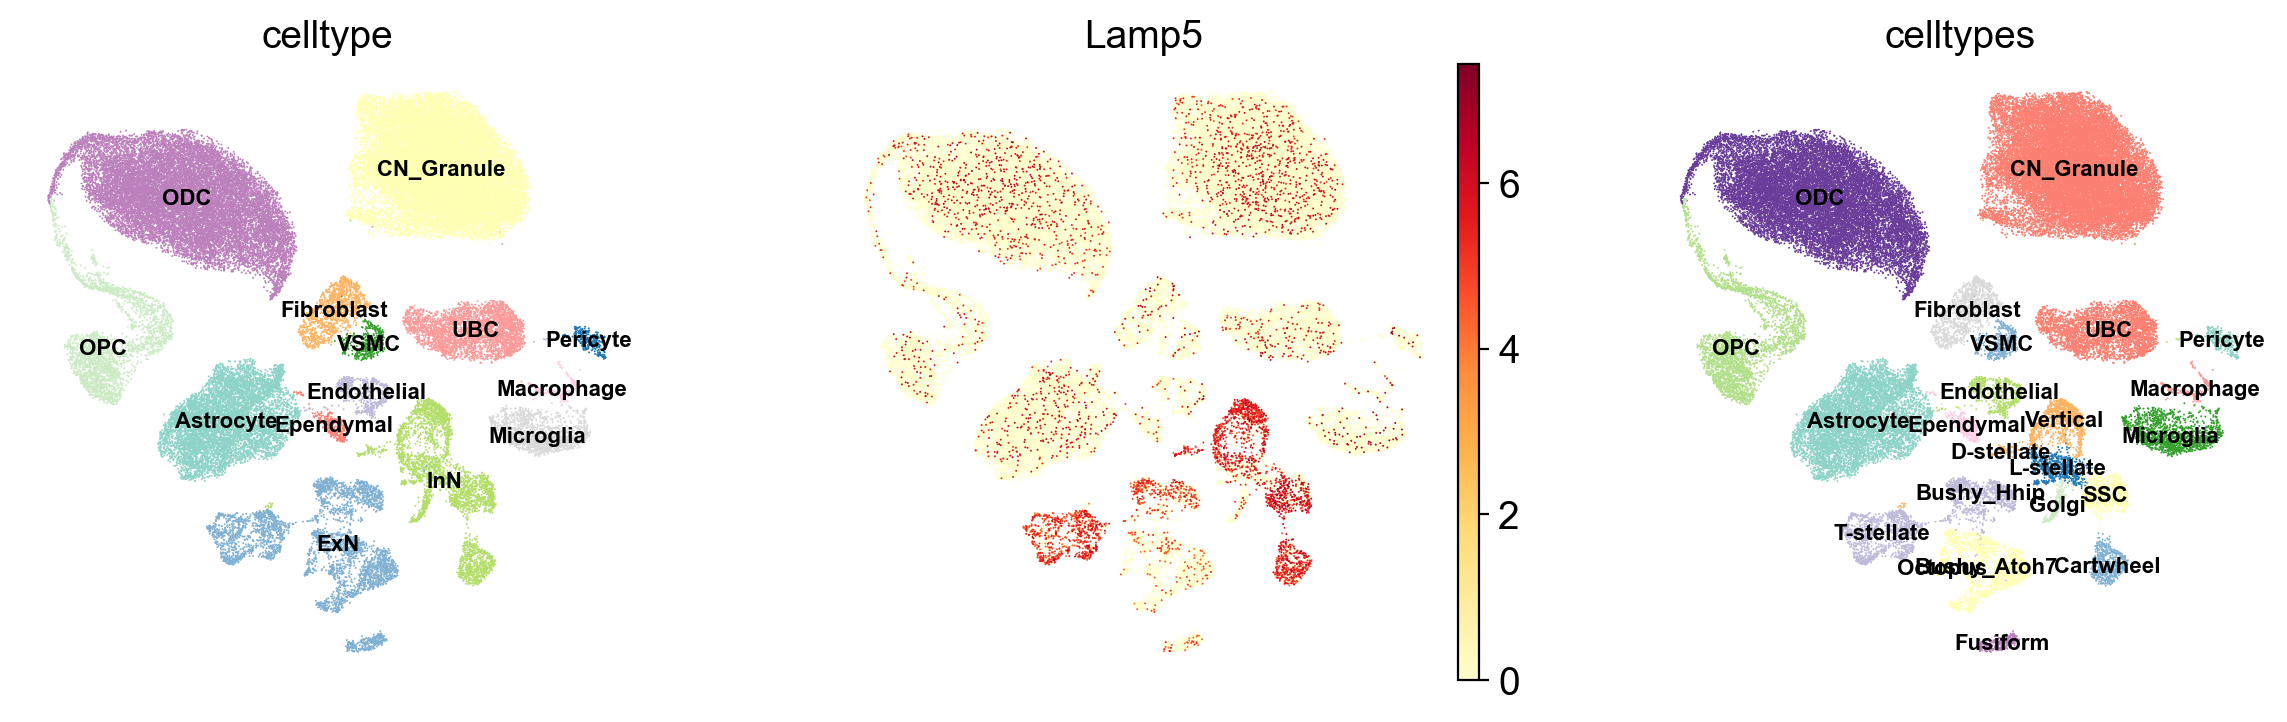

In [10]:
sc.pl.umap(cn, color = ['celltype','Lamp5','celltypes'],
          frameon =False,legend_loc ='on data', legend_fontsize = 8,cmap ='YlOrRd')

In [11]:
genes =[ 'Snap25',#'Rbfox3','Syt1', #'Snap25',# neuron
        'Gabra6',                              # Granule 
        'Samd3',
        'Slc17a7','Slc17a6',                   # excitatory neurons 'Stmn2',  
        'Slc6a5',               # GABAergic interneurons'Gad1','Gad2','Slc32a1', 
        'Slc1a2','Aqp4','Gja1',      # Astrocyte'Gfap',Aldoc 'Slc4a4','Gpc5','Gfap',,'Fabp7', 'Slc6a11','Ntsr2',
                                      # Bergmann'Gdf10',
        'Foxj1', 'Vim', 'Sox2',                              # Ependymal
                                    # Choroid  'Ttr', 'Enpp2',    'Otx2',   
  
        'Ptprc','Csf1r','C1qa',   # Microglia 'C1QA','Cd74','P2ry12','C1qb','Cd68','Trem2',   'Cx3cr1',
        'Mrc1',                                # Macrophage
        'Mobp','Mag','Mog',                    # Oligodendrocytes, 'MAG','Plp1','Mbp','Pcdh15', 'Cldn11',
        'Vcan',  'Pdgfra', 'Olig2',    # OPCs 'OLIG1','PTPRZ1','Ptprz1',   ,'Olig2','Olig1','Ppfibp1',
        'Flt1','Cldn5',                 # Endothelial'Rgs5','Igfbp7', 'Col4a2','Hes1', 'Cldn5', 'Itm2a',  
        'Pdgfrb','Vtn',                              # pericytes 'PDGFRB'
        'Dcn', # Fibroblast
       'Mgp']  # vascu

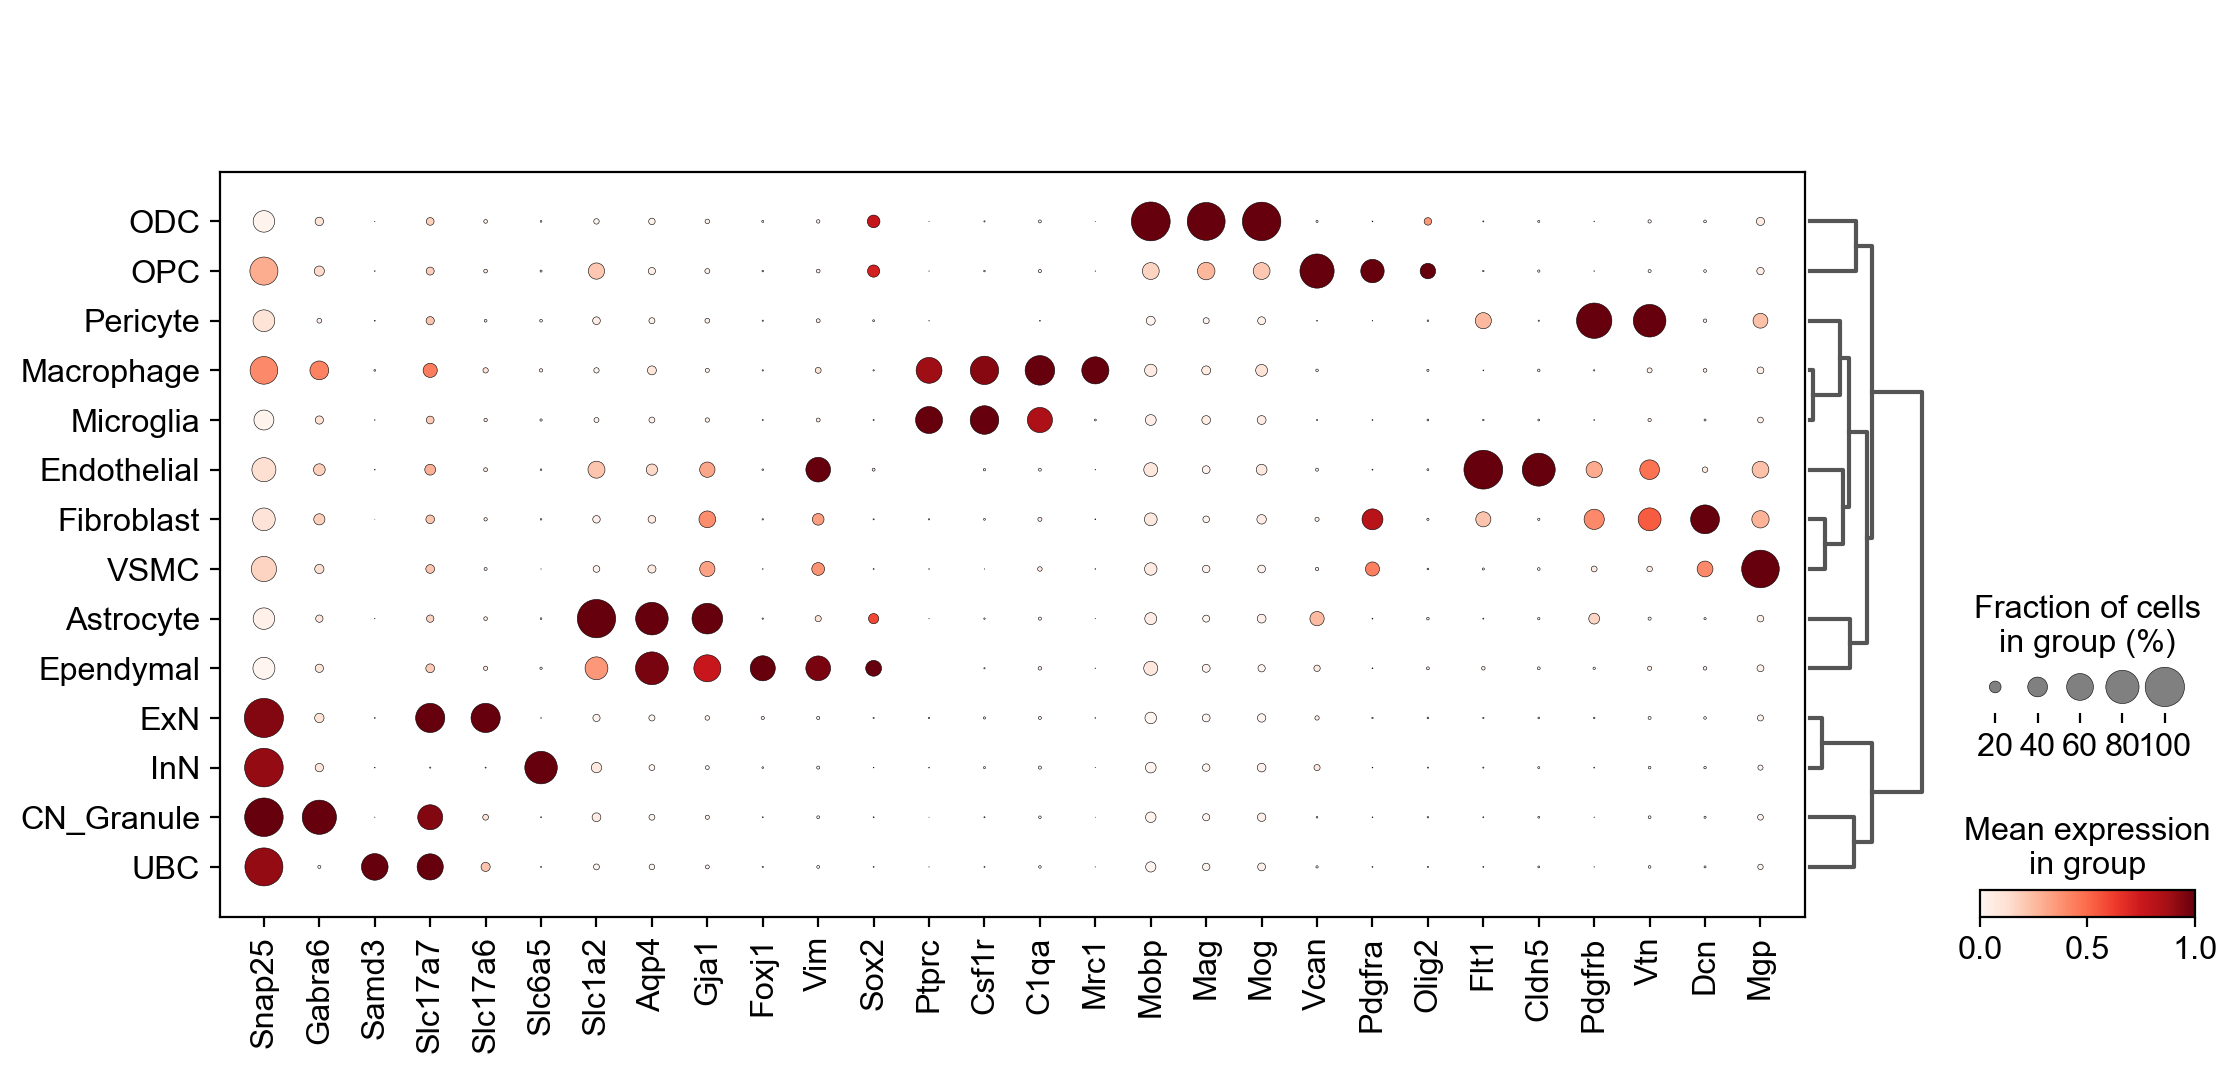

In [12]:
sc.tl.dendrogram(cn,groupby='celltype')
sc.pl.dotplot(cn, genes, 
                     groupby='celltype', swap_axes=False, standard_scale = 'var',vmin = 0.0, 
                     dendrogram=True,cmap = 'Reds',#save = 'neu.dotplot.pdf'
             )

In [3]:
ubc = neu[neu.obs['clusters'].isin(['UBC'])].copy()

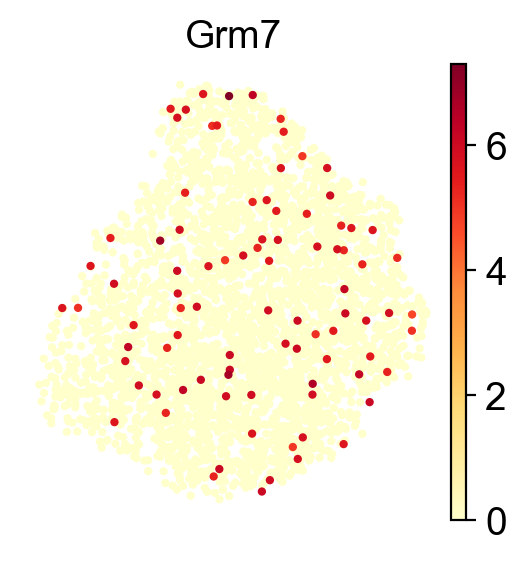

In [58]:
rcParams['figure.figsize'] = 3, 3
sc.pl.umap(ubc,color =  ['Grm7'],  
           ncols =3,  vmin = 0,
           cmap = 'YlOrRd',frameon =False)

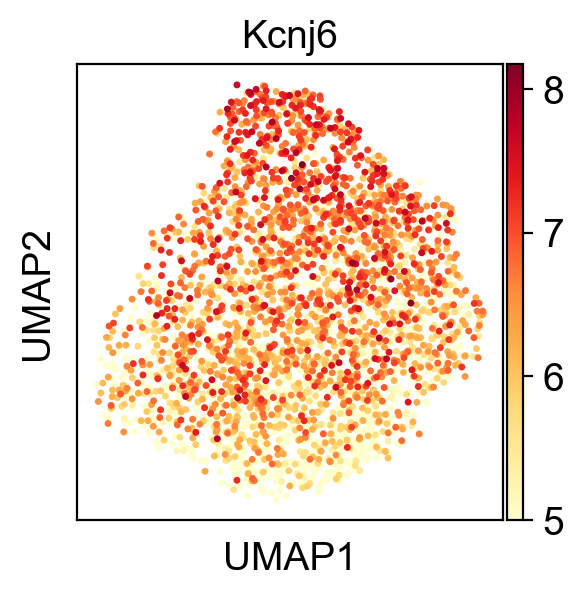

In [91]:
sc.pl.umap(ubc,color =  ['Kcnj6'],  
           ncols =3,s = 25,vmin = 5,
           cmap = 'YlOrRd',frameon =True, save = '_Kcnj6.pdf')

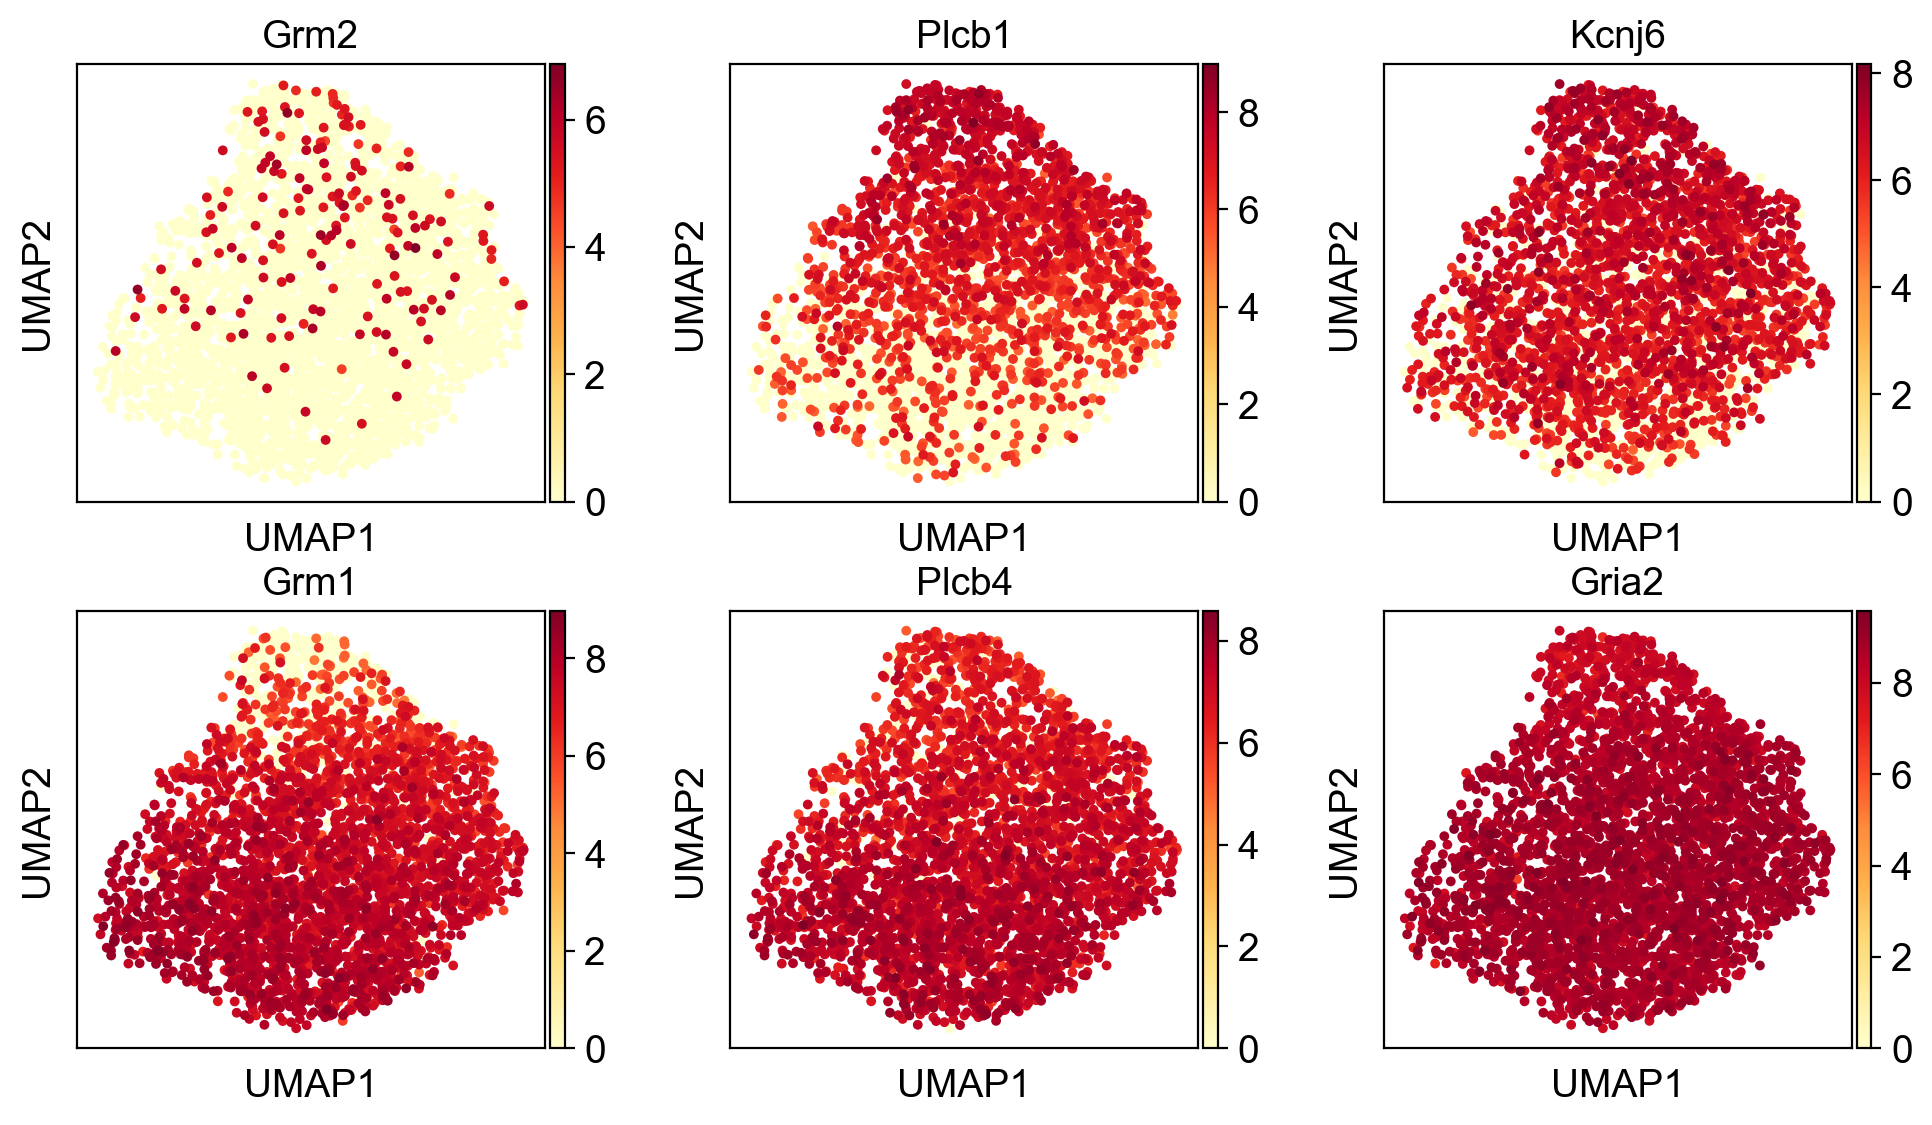

In [71]:
sc.pl.umap(ubc,color =  ['Grm2','Plcb1','Kcnj6','Grm1','Plcb4','Gria2'],  
           ncols =3,s = 50,
           cmap = 'YlOrRd',frameon =True)

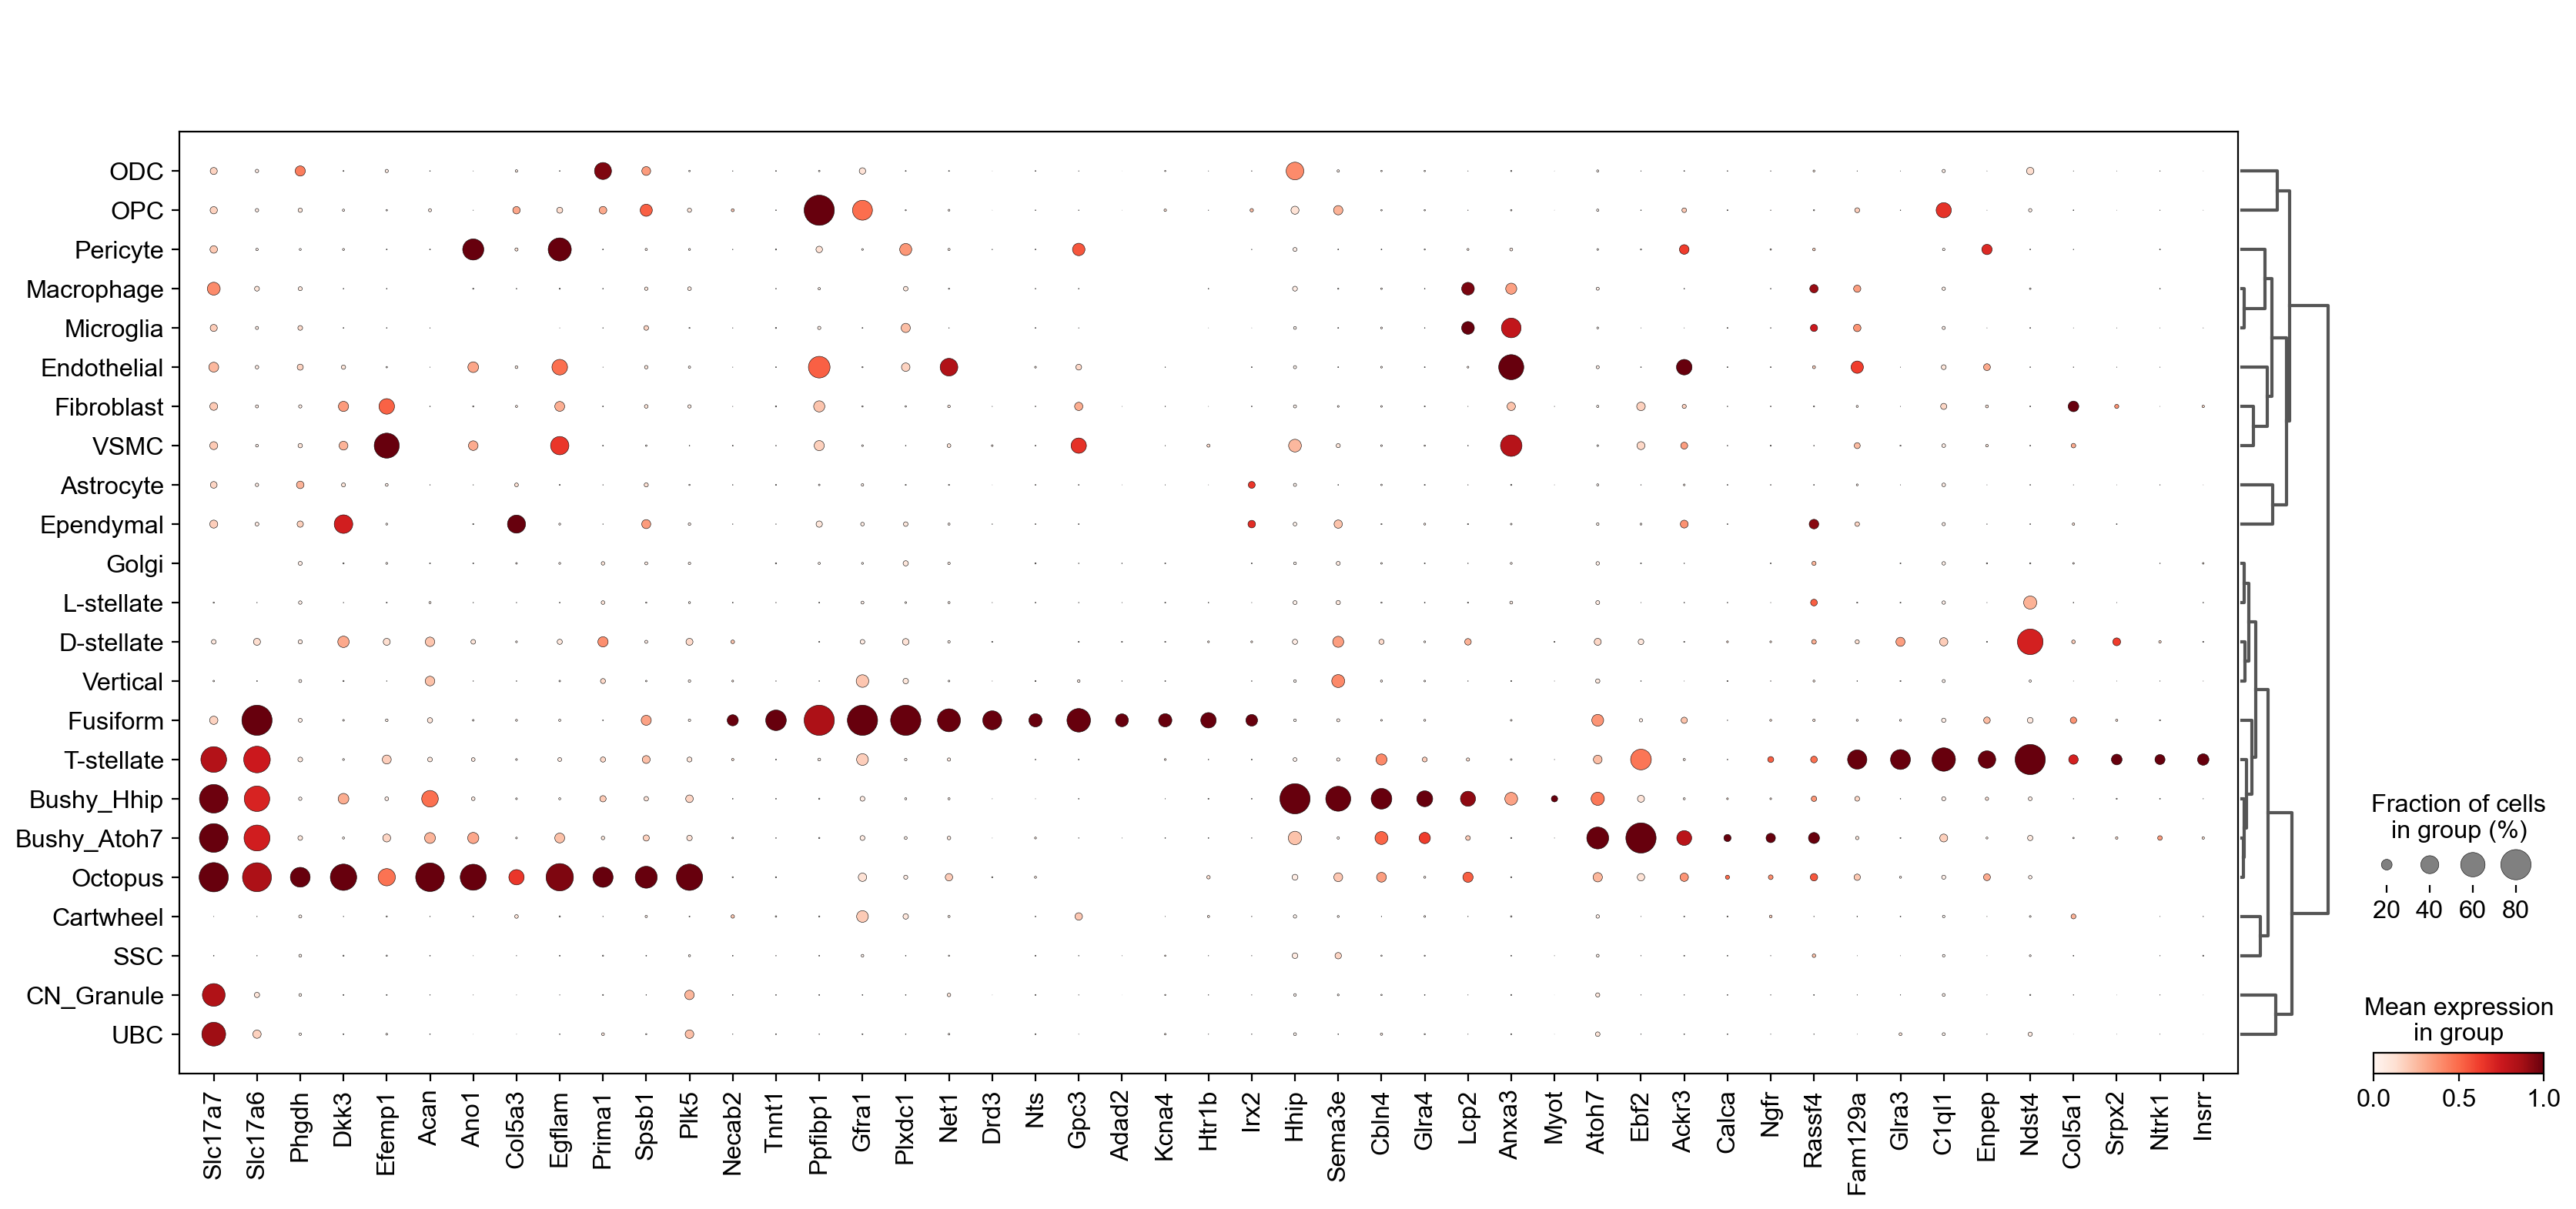

In [15]:
genes = ['Slc17a7','Slc17a6',
         'Phgdh','Dkk3','Efemp1', 'Acan', 'Ano1', 'Col5a3', 'Egflam', 'Prima1', 'Spsb1','Plk5',
         'Necab2', 'Tnnt1', 'Ppfibp1', 'Gfra1', 'Plxdc1','Net1', 'Drd3', 'Nts',  'Gpc3', 'Adad2', 'Kcna4', 'Htr1b', 'Irx2',
         'Hhip','Sema3e', 'Cbln4', 'Glra4', 'Lcp2','Anxa3', 'Myot',
         'Atoh7', 'Ebf2','Ackr3', 'Calca',  'Ngfr','Rassf4',
         'Fam129a','Glra3', 'C1ql1', 'Enpep','Ndst4','Col5a1', 'Srpx2','Ntrk1',  'Insrr'
        ]


sc.pl.dotplot(cn, genes, 
                     groupby='celltypes', swap_axes=False, standard_scale = 'var',dot_max = 0.8,
                     dendrogram=True,cmap = 'Reds',
            # save = 'data_all_ExN_marker_dot_plot.pdf'
             )

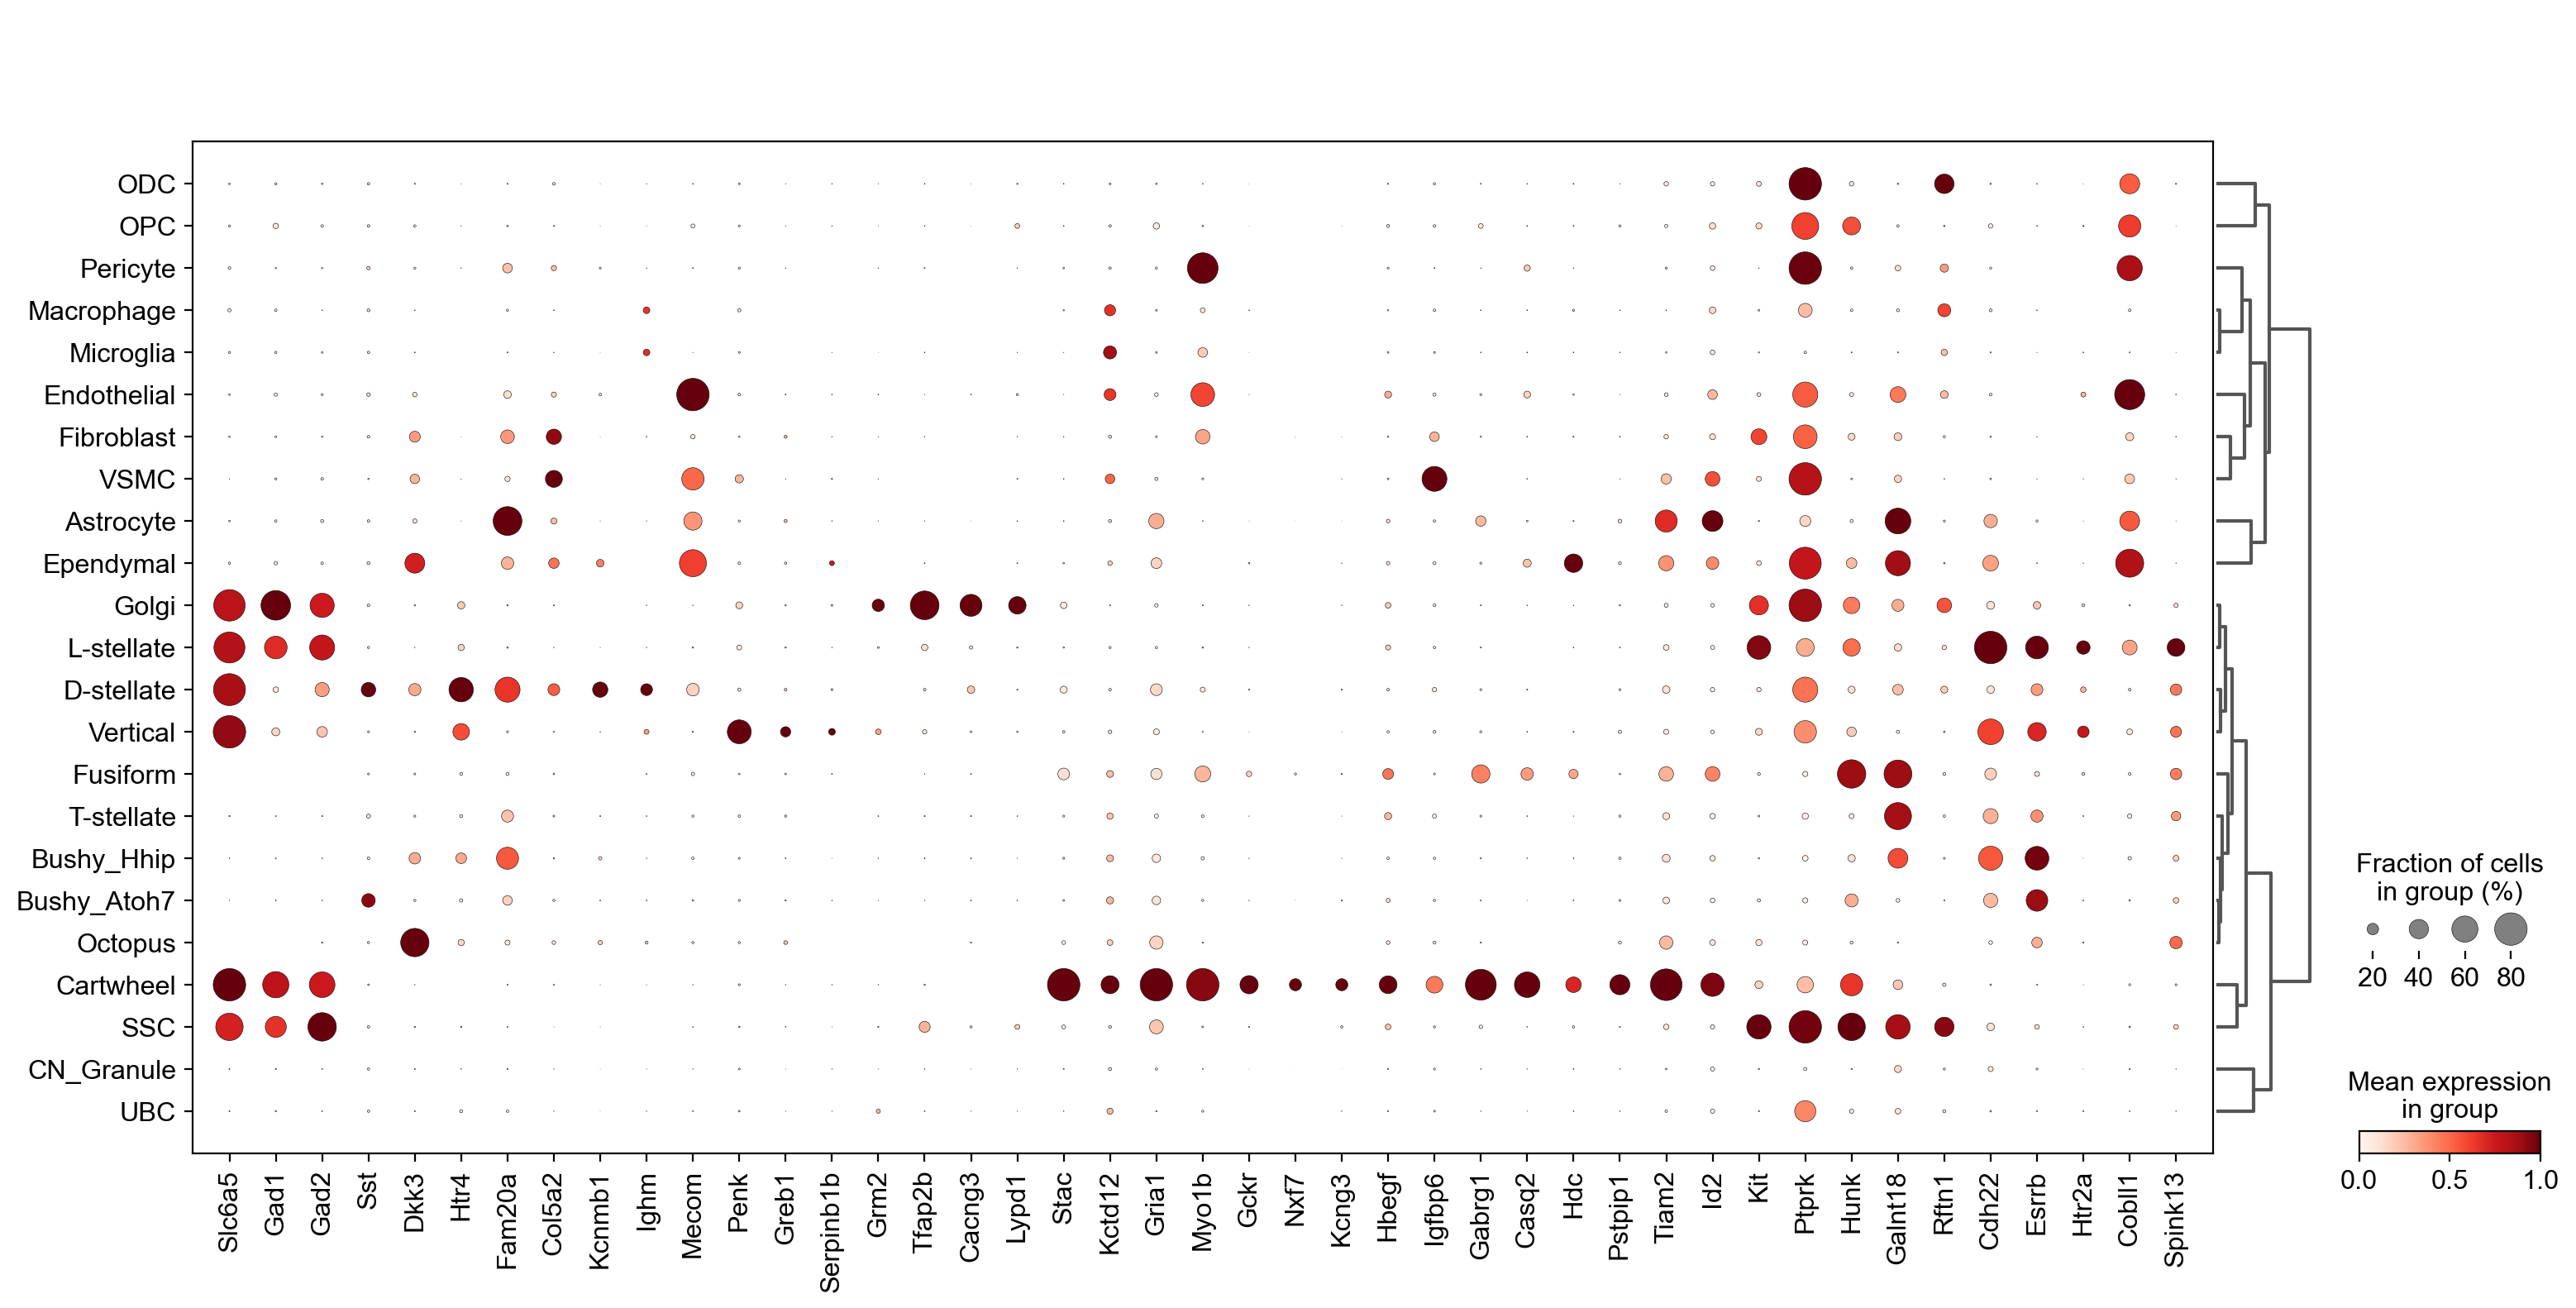

In [16]:
genes = ['Slc6a5','Gad1','Gad2',
         'Sst','Dkk3','Htr4','Fam20a','Col5a2','Kcnmb1','Ighm','Mecom',
         'Penk','Greb1','Serpinb1b',
         'Grm2', 'Tfap2b', 'Cacng3', 'Lypd1',
         'Stac','Kctd12','Gria1','Myo1b', 'Gckr', 'Nxf7', 'Kcng3', 'Hbegf','Igfbp6', 'Gabrg1', 'Casq2', 'Hdc', 'Pstpip1', 'Tiam2', 'Id2',
         'Kit','Ptprk','Hunk','Galnt18','Rftn1',
         'Cdh22','Esrrb', 'Htr2a', 'Cobll1', 'Spink13'         
        ]

sc.pl.dotplot(cn, genes, 
                     groupby='celltypes', swap_axes=False, standard_scale = 'var',dot_max = 0.8,
                     dendrogram=True,cmap = 'Reds',
             #save = 'data_all_InN_marker_dot_plot.pdf'
             )